In [29]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pendulum
#import QLearningParameters as qparams


In [30]:
def get_cost(x,u):
    cost = (x[0]-np.pi)**2 + 0.01*(x[1]**2)+0.0001*(u**2)
    return cost

In [31]:
# we don't want 2pi to be in the set because it's the same as 0
# we generate 50 equally spaced points for theta
discretized_theta = np.linspace(0, 2*np.pi, 50, endpoint=False)

# we generate 50 equally spaced points for omega
discretized_omega = np.linspace(-6, 6, 50)

# Controls = [-4,0,4]

In [51]:
#Global parameters
controls = np.array([-4,0,4])
learning_progress = []

In [52]:
def get_policy_and_value_function(q_table):
    # Function to compute the optimal policy and optimal value function from a q table.
    
    optimal_value_function = np.zeros([50,50])
    optimal_policy = np.zeros([50,50])
    
    for i in range(50):
        for j in range(50):
            
            opt_index = np.argmin(q_table[i,j,:]) #Find the least Q value
            optimal_value_function[i,j] = q_table[i,j,opt_index]
            optimal_policy[i,j] = controls[opt_index] #indexes
            
    return optimal_policy, optimal_value_function

In [53]:
# Function to find index of closest value
def find_nearest_value_index(array, value):
    index = np.argmin(np.abs(array - value))
    return index

In [54]:
def q_learning(q_table):
    # Function that implements tabular Q-learning algorithm
    
    # Define Q-learning parameters
    epsilon = 0.1                  #epsilon greedy probability (Best 0.00001)
    N = 100                        #length of each episode
    alpha = 0.99                   #Parameter from cost function
    
    step_size = pendulum.DELTA_T             #Learning rate (gamma) 
    
    num_episodes = 0  
    
    learning_progress.clear()
    
    while(num_episodes<6000):
        
        x = np.transpose(np.array([0.,0.]))
        
        num_episodes = num_episodes+1
        
        episode_cost = 0
        
        #optimal_policy, optimal_value = get_policy_and_value_function(q_table)
        
        for i in range(N):
                        
            theta_index = find_nearest_value_index(discretized_theta,x[0])
            omega_index = find_nearest_value_index(discretized_omega,x[1])
            
            #Choose action according to epsilon greedy policy
            index = np.argmin(q_table[theta_index, omega_index,:])
            u_optimal = controls[index]
            
            u_rand = int(np.random.choice(controls,1))
    
            u_chosen = int(np.random.choice([u_optimal,u_rand],1,p=[1-epsilon,epsilon]))
            u_chosen_index = np.where(controls == u_chosen)
            
            # Compute next state
            x_next = pendulum.get_next_state(x,u_chosen)
            theta_index_next = find_nearest_value_index(discretized_theta,x_next[0])
            omega_index_next = find_nearest_value_index(discretized_omega,x_next[1])
            
            # Compute current cost and optimal cost
            cost = get_cost(x,u_chosen)
            cost_optimal = get_cost(x,u_optimal)
            
            #Optimal value from next step
            Q_next = np.amin(q_table[theta_index_next, omega_index_next, :])
            
            # Current Q value
            Q_current = q_table[theta_index, omega_index, u_chosen_index]
            
            # Temporal difference error
            error = cost + alpha*Q_next - Q_current
            
            #Track episode cost
            episode_cost = episode_cost + cost_optimal
            
            #Update step
            q_table[theta_index, omega_index, u_chosen_index] = Q_current + step_size*error
            
            x = x_next
            
        learning_progress.append(episode_cost)

    print('Number of Episodes = ', num_episodes)    
    
    return q_table

In [55]:
Q_Table = np.zeros([50,50,3]) #Initialize Q table
Q_Table_out = q_learning(Q_Table) #Learn Q Table
invert_policy, invert_value_function = get_policy_and_value_function(Q_Table_out)


Number of Episodes =  6000


# Learning Progress

<IPython.core.display.Javascript object>


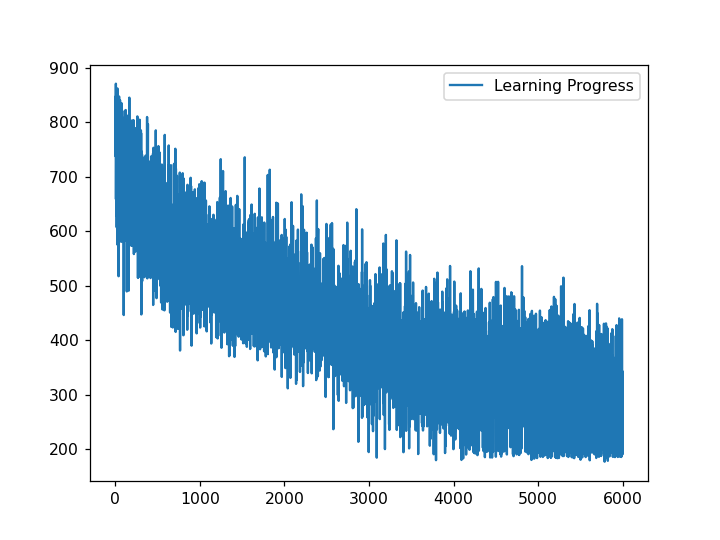

In [56]:
# Plot learning progress
plt.figure()
plt.plot(learning_progress)
#print(learning_progress)
plt.legend(['Learning Progress'])

In [57]:
def invert_controller(x):
    theta_index = find_nearest_value_index(discretized_theta,x[0])
    omega_index = find_nearest_value_index(discretized_omega,x[1])
    
    u_optimal = invert_policy[theta_index, omega_index]
    
    return(u_optimal)

In [58]:
T = 10.
x0 = np.transpose(np.array([0,0]))
t, x, u = pendulum.simulate(x0, invert_controller, T)

<IPython.core.display.Javascript object>


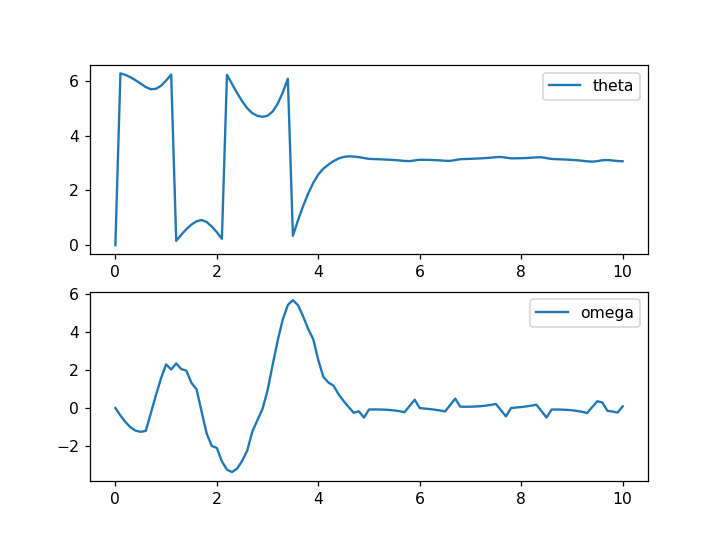

<IPython.core.display.Javascript object>


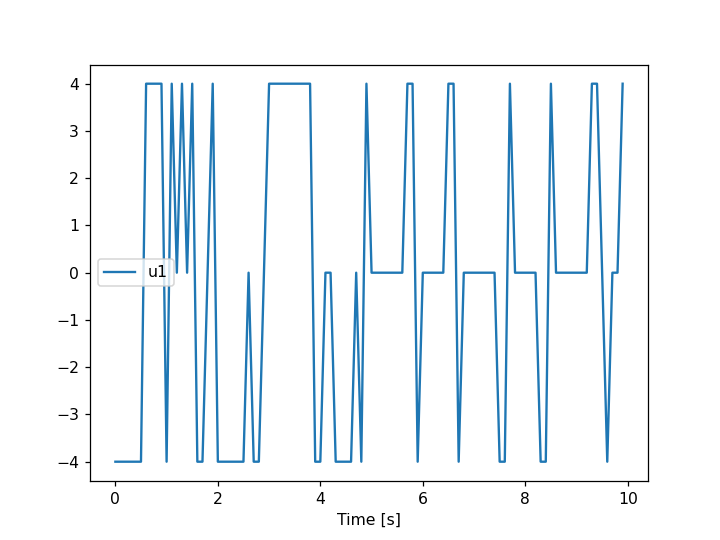

Text(0.5, 0, 'Time [s]')

In [59]:
# Plots

plt.figure()

plt.subplot(2,1,1)
plt.plot(t, x[0,:])
plt.legend(['theta'])

plt.subplot(2,1,2)
plt.plot(t, x[1,:])
plt.legend(['omega'])

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1'])
plt.xlabel('Time [s]')

# Animation


In [60]:
pendulum.animate_robot(x)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAk01tZGF0AAACoQYF//+d
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSAtIEguMjY0L01QRUctNCBBVkMgY29kZWMg
LSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwg
LSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMg
bWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5n
ZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEg
ZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xMiBsb29rYWhlYWRfdGhy
ZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVy
YXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9h
ZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBr
ZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xv
b2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFw
bWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA0lZYiEABD//veBvzLL
XyK6yXH5530srM885DxyXYmuuNAAAAMAAAMAAUeHteuN3YNbSdAAABrAA6Qix/9vpDjcAE/ZYPzW
Iy/xaAfWoiuIxPmK2D7zN1SWOL4zZ8ixj9mJWyafzaQPJPgumMKQ5V59n8tUzfUDS0tnaGINepwN
ygSCAo62Nj0Ixhv5SVoJFUYpmvY7OlceVopm0K7e9iLYzS+7C8RJRANe5oQnlmwO88l0TgfHNasA
cBupheGfaeEXLZmHWO+X2fTyHC+vtQ7TaNefQ7CHnR1luQXnqFHjCK9efiyP+qu6t8Lv5Q2TfbSJ
Uzs0SeYcbqwmukz92HSdD7mvf05DpwdQWbSEHWRNjTXhumQVil9qnvK4qtsUvcIMXzoSTSbemIa1
zJu841W2+V44G5B3MZ0BrlgHnYsCWKot35uLoxydIpjYWg9+7lBp1dLoRR8HR6ljB55JGWL+XQwN
sLum9zkPSkcJ+V/Ngl3Qa8E35Nz34JkIu35PUQAXNmP5a/sJO/zRhyFusW1qwkI1iN5DIJp2XQqA
bPb8kSwU6QlSI+2r/Ap+Q0l5RJ/0nftzawE1OQzWCRSL/fGQO94rq9bladJxrF8QRZSdR9vuHOb9
LHOidxh0CfkFn1zDDKZ6xn6mDvAAWWi6LbBQfyx5GxcLoqexfshUiZjj4579qehLAs2eJLYzPFtX
V2hBtrLktP6rM42xUGNNvgCK9lWuYNYdSaxwDc1pu17ohfTzwWOzfKAC521nnAAABLDBRyppjkCS
+mzqyBuBcy6xUTlQjfGN0lmX1gZ4VQuWcWCnVM7lLYuK/XiiWJIeYSAF/K+AlQZj6+JcX7eyUxRQ
2+M3jcNu+XI9+1Cai1PASc0viqTtA9ZndKYQpAhlJqGaymTVqCl3jB8VykVBD2Cxu3DB7FHgaxH7
8I3+kyAT5qOV/ybPTVIqeiUFtxODUHGAMk4WxKuUWq3/OaDlW9fWV84dq2Gi+jLt13+9hSqMu+W9
g1BYVtdWrC9IHXzsPXHev/y81KCsG+3564aevIvqDyI8tb2VUcQJKeetHuhitZz2novLgo0vtnIc
2n0sZ+ZBm89b/17pLaiazFXE+ZE0Cm4MZ7MZTkWhB/1PVxgtNUk3osb9jZI6unCX7cfEaLYWnNV1
ysDqshseaIJiHdLGfmQiUWS/vfxCPLV5r64YqsrLAeSc9n6El/KFlPLLYWS1C9hkmvXrclkTwbXG
5Uevo8/Y8+nCprZT/Zq7IqkuQNoD1KbEiA1ph2Eo4mSdZNZd1g7CthdVDr0W013luBzCHdd0TmYS
FITDARLM/2mCsOIf/37Tuf5iYy2NXXf5DSPLlLxX0CmKawL+yX7m+FgnEGySWsh9I0smzZTwhJTB
7dsZskrBPgeZyVuTklHAAR7dLwlUNkvrB1wW8hRfbHDV97ZOjHmxwLgYDFII7re7lFHJvo1IOk/q
fikR1C4ceZY6qxbhfE8QrgDi/wvHcZ5gCzm+4LFW9GQgXyqsGBy5LzuVW3N+c2En3nFplnc88/4E
X751PE5H2c4I8nVrCyLlxAaVs49aIGe5gGUiL+w5QA+I4k7wEyZOUge0dqH3MxWq9OsI87FnHmMi
yYBzkTu1GXEtKbuFc7su8YKcvGn79zHcb6ZrMXmLMFjJcW/io70aAI3cHWUccFcRp/DfZh4tKJ7H
vHEGPhyOZgLaE0zPz1ig8eCBBVhK3YSQ96Qw0QTyuEH2FKZ8MfUS9c+XjZpPKBxyU/LUOVcplx3X
AOkz6/8YAgmGSdUk78rS2dKmX9W//+Z107tbKGRT0j5iqdERHFtNr8oXBh3r2S7jIFzR1jMFOnDJ
HKaxZodHfPkL1ZXS/qE3u//sj3W2bfKPC6Ru3bEj4zwO3k4LQJfaw4/YqSUnpSai4uYN0OVyOUx3
YW7ZuCgqdkmTJMwHYdvTPIV0eSGELYV9h1PnlWh9MYF5bckd9NO12OB/O0iVpaG1JUaYald9Nl2k
5VcVSodemFU4MO4BT15tWC9LXG/0e20ZopPgxq3ZKjbEfixgB9Ti/vJ5k+Zbe2TjNP+wQwE/H804
ZDl2JC7ZJ5aksuDCR6I9no8n8BQf3MS/VggS9mE941djEXF+LKq2qUEZL87CTY3AmPayTKt0mU41
JRJUWHUa7dsZ127ejB/MMvdTGQVZaE14NEIWWuclM5ytXW1qTzE6SCGDT/v777SkIKZAADOubhGf
/g4Rfj3/+/x+qd3naAqnqZI4QLuFe7wWeNDN64PNq4eg+yZ6FZWlDa52cOBRAu8wpw0Lqrwx+Kl/
E62Pn2msFH6b7zGhhfTK658bDWRQkN4B8vs5zzX9dcpVO/rxkPInZtMKehhZ98nWmjY0eYjLnmkD
9Yl97nUwDufJRNC6oeUiCbMTbJ/Jw7TjV+OqlmXzoYig/gAAHJqIzbGPIdri9ITddp6IIJRhUYgj
C+AAAAMAV3eq7vuBnnfP/u8hKMAABjUDLzbisKkcxlyEAE4fXb6UjEEdbCcANyvRS4MAOwf19jaW
by4QN1JKsIQVuJv7NyRD008aqqNak57wxo7Js9g7AHEcBJn8M9O0u+ztQYFI+88+lTtmytQ3aZ54
zaNs3ggmPvOnR9mL3hqiW8h/rYHQOwmhdHlIklVOm2/5/MgE6CIq7+CyVqra9IMX2lxbILVBTYG9
b++L/DYTxXJ2LygH6d2nmg1d1kMEy1UHbabiuZGS74Tb2rX0q9UA7bAuPPckIEEj7BkxFcL7B1Wi
OdJiDFyZt0zWChyEuHjDsHve8h5RLqwkVMmD5NEORS//KCmmx2YHe8/H7xa7RIxRar9FuqVpiL41
AZ4AaxT9NM/jFYmmKxOQzGs5Mb/zQNcHeh2Oubhx/UvcX7i98+naUKcoBDnNX9QpQw3i3r5yhPlt
DTyULb3g0BkNcBIwX2BPm

# Value Function

<IPython.core.display.Javascript object>


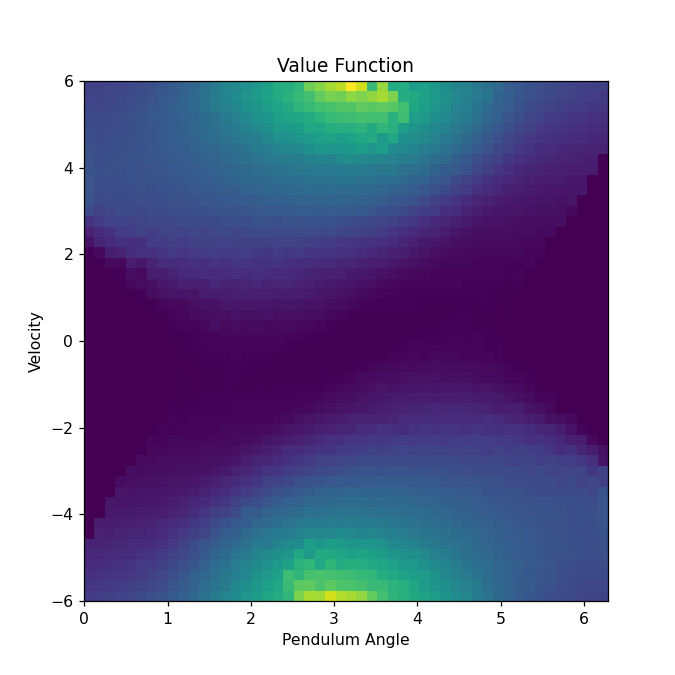

<IPython.core.display.Javascript object>


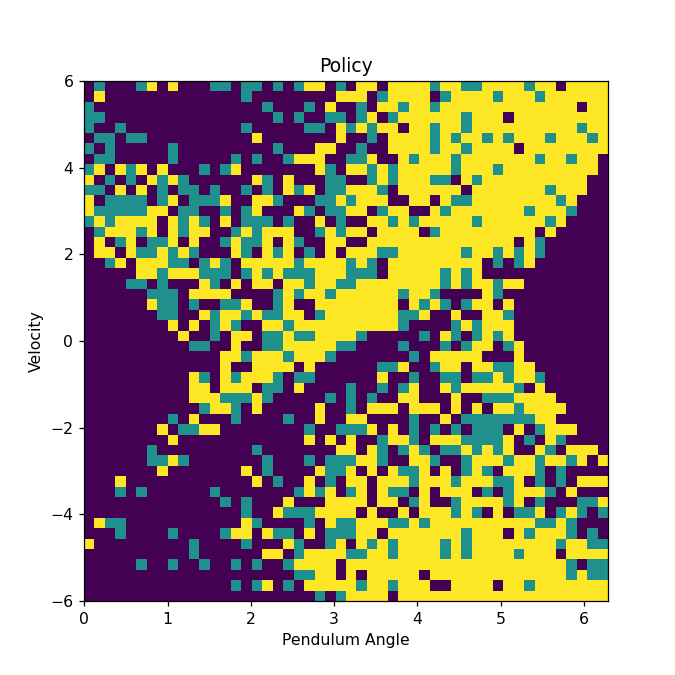

Text(0.5, 1.0, 'Policy')

In [61]:
# we plot the value function
plt.figure(figsize=[6,6])
plt.imshow(invert_value_function, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Value Function')

# we plot the policy
plt.figure(figsize=[6,6])
plt.imshow(invert_policy, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Policy')